**Análise e Visualização**


**Banco de dados com informações principais extraídas das doze derivações.**


In [15]:
import pandas as pd

# sep = ";" indica que o separador do banco de dados #Nesse caso é separado por vírgula
banco = pd.read_csv("/home/renandrades/Estágio/NovosTestes/Banco3.csv",  na_values = '?')

dir(banco)

print 'Banco com %d amostras e %d colunas\n' % banco.shape

print "Tabela sumarizando as colunas do banco\n"
print(banco.describe())
# "describe" descreve dados estatísticos do banco.


Banco com 451 amostras e 16 colunas

Tabela sumarizando as colunas do banco

            Idade        Sexo      Altura        Peso    QRS (ms)    P-R (ms)  \
count  451.000000  451.000000  451.000000  451.000000  451.000000  451.000000   
mean    46.558758    0.549889  166.268293   68.254989   88.827051  155.139690   
std     16.379336    0.498057   37.172407   16.511254   15.252724   44.891232   
min      0.000000    0.000000  105.000000    6.000000   55.000000    0.000000   
25%     36.000000    0.000000  160.000000   59.000000   80.000000  142.000000   
50%     47.000000    1.000000  164.000000   68.000000   86.000000  157.000000   
75%     58.000000    1.000000  170.000000   79.000000   94.000000  175.000000   
max     83.000000    1.000000  780.000000  176.000000  188.000000  524.000000   

         Q-T (ms)      T (ms)      P (ms)         QRS           T           P  \
count  451.000000  451.000000  451.000000  451.000000  443.000000  429.000000   
mean   367.186253  169.847007  


**Observando a coluna 'Altura' existem valores inváidos ou preenchidos incorretamente, será limitado em 250 centímetros a altura máxima. Criando agora um novo banco = 'Banco2'**


In [16]:
banco2 = banco.drop(banco[(banco['Altura'] > 250)].index)

**Identificando agora as colunas com dados faltantes, e substituindo por 'NAN'**

In [17]:
import numpy as np

#Todas as colunas? ou só as que eu sei que tem dados faltantes
#or col in ['T','P','QRST','J','Batimentos']:
#    banco2[col] = banco2[col].replace("?",np.nan)

   
banco2.isnull().any()


Idade         False
Sexo          False
Altura        False
Peso          False
QRS (ms)      False
P-R (ms)      False
Q-T (ms)      False
T (ms)        False
P (ms)        False
QRS           False
T              True
P              True
QRST           True
J              True
Batimentos     True
Classe        False
dtype: bool

**Identificando a quantidade de dados faltantes**

In [18]:
def num_missing(x):
    return sum(x.isnull())

print "Quantidade de valores ausentes:\n"

print banco2.apply(num_missing, axis=0)


Quantidade de valores ausentes:

Idade           0
Sexo            0
Altura          0
Peso            0
QRS (ms)        0
P-R (ms)        0
Q-T (ms)        0
T (ms)          0
P (ms)          0
QRS             0
T               8
P              22
QRST            1
J             374
Batimentos      1
Classe          0
dtype: int64


**Agora vamos observar quais são as distruições de cada dado. Para isso, vamos usar o método hist() do pandas.**

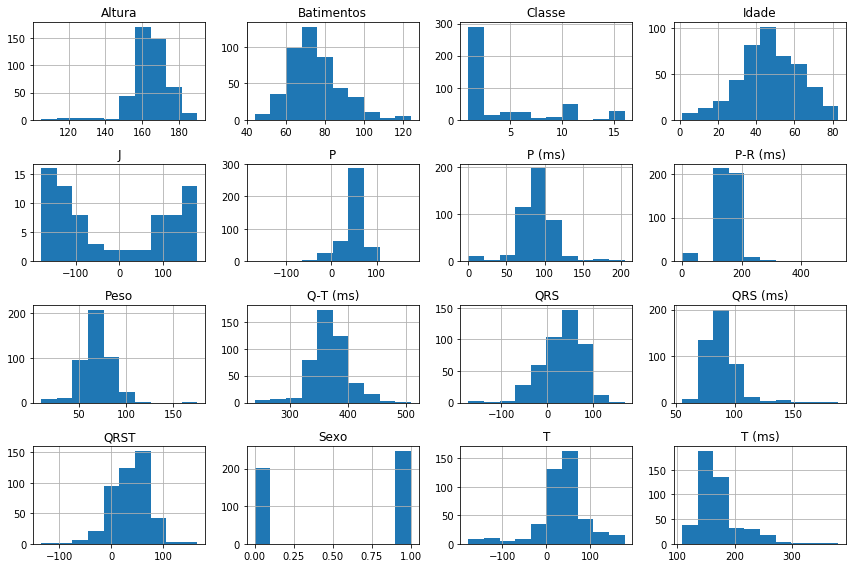

In [19]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (12,8))

banco2.hist(ax = ax)

plt.tight_layout()
plt.show()

plt.close()


**Limitando em apenas duas classes, todos so casos de diferentes arritimias serão uma única classe.**

In [20]:
banco2.loc[banco2['Classe'] == 1, 'Classe'] = 0
banco2.loc[banco2['Classe'] > 1, 'Classe'] = 1
#Classe: 0 = Normal   1 = Arritimia


**Considerando agora a distribuição entre as classes, sendo:**

    0 = Nornal (NEG)
    1 = Arritimia (POS)
    
**Uma análise separando as classes vai ajudar a enxergar como se comportam as variáveis em cada grupo, o que nos
ajuda a detectar mudanças em cada caso. Considerando também 0 para homens e 1 para mulheres.**   


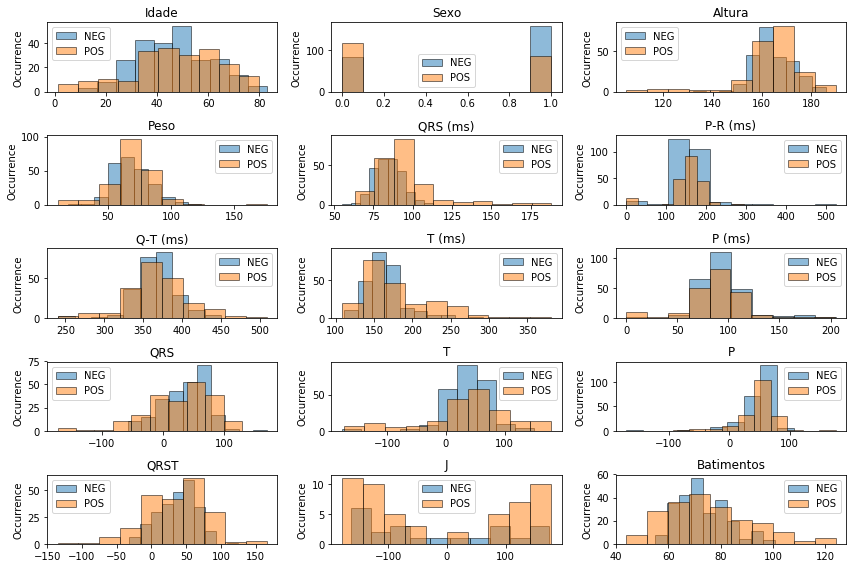

In [22]:
fig,axes = plt.subplots(5,3,figsize = (12,8))

npos = banco2['Classe'].sum()
nneg = banco2['Classe'].shape[0] - npos

i = j = 0

for idx, col in enumerate(banco2.columns[:-1]):
    # Grupo 0: Casos Normais
    tmp0 = banco2.loc[(banco2.Classe == 0) & ~(banco2[col].isnull()), col]

    # Grupo 1: Casos Arritimias
    tmp1 = banco2.loc[(banco2.Classe == 1) & ~(banco2[col].isnull()), col]
    
    i = idx / 3
    j = idx % 3


    axes[i][j].hist(tmp0, label ='NEG', alpha = 0.5, lw = 1,edgecolor='black')

    axes[i][j].hist(tmp1, label ='POS', alpha = 0.5, lw = 1,edgecolor='black')

    axes[i][j].set_title(col)

    axes[i][j].set_ylabel('Occurrence')

    axes[i][j].legend()

    
plt.tight_layout()
plt.show();



/home/renandrades/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/renandrades/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/renandrades/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/renandrades/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/renandrades/.local/lib/python2.7/site-packages

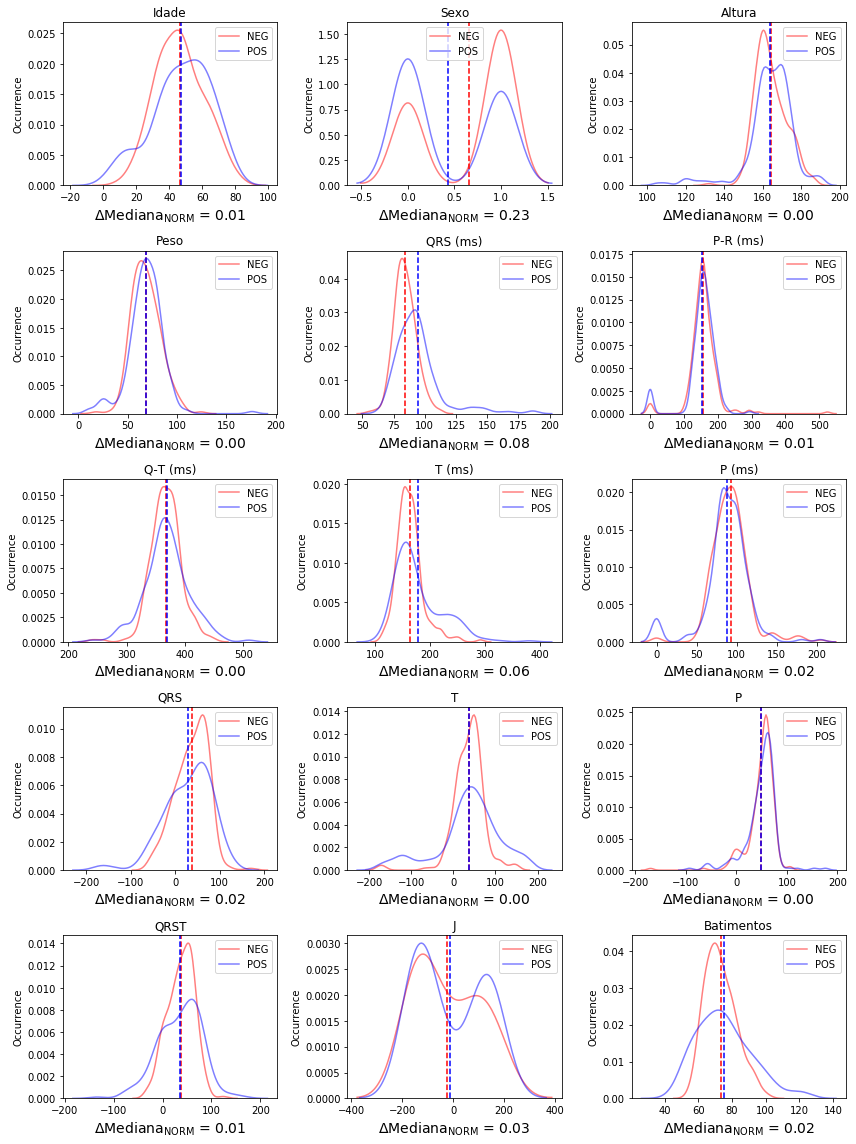

In [25]:
import seaborn as sns

fig,axes = plt.subplots(5,3,figsize = (12,16))

i = j = 0

for idx, col in enumerate(banco2.columns[:-1]):
    #tmp0 = banco2.loc[banco2.Classe == 0, col]
    tmp0 = banco2.loc[(banco2.Classe == 0) & ~(banco2[col].isnull()), col]
    
    #tmp1 = banco2.loc[banco2.Classe == 1, col]
    tmp1 = banco2.loc[(banco2.Classe == 1) & ~(banco2[col].isnull()), col]
    
    i = idx / 3
    j = idx % 3
    
    sns.kdeplot(tmp0, ax = axes[i][j], label ='NEG', alpha = 0.5,c = 'r')
    
    sns.kdeplot(tmp1, ax = axes[i][j], label ='POS', alpha = 0.5,c = 'b')
    
    # cálculo das medianas e plotagem com a função axvline(x = mediana)
    median0 = tmp0.mean()
    median1 = tmp1.mean()
    
    #recebendo agora as médias
    
    axes[i][j].axvline(x=median0,c='r', linestyle='--')
    
    axes[i][j].axvline(x=median1,c='b', linestyle='--')
    
    axes[i][j].set_title(col)
    
    axes[i][j].set_ylabel('Occurrence')
    
    axes[i][j].legend()

    # vamos adicionar uma caixinha com a distância entre as medianas
    # vamor normalizar para interpretar essa distância independente da escala

    diff_med = abs(median0 - median1)
    min_val = banco2[col].min()
    max_val = banco2[col].max()

    diff_med_norm = (diff_med)/(max_val - min_val)
    
    axes[i][j].set_xlabel( r'$\Delta$Mediana$_{\mathrm{NORM}}$ = %.2f' % (diff_med_norm), fontsize=14)

plt.tight_layout()
plt.show();


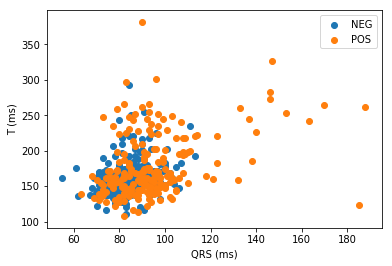

In [9]:
tmp0 = banco2.loc[(banco2.Classe == 0) & ~(banco2[col].isnull())].astype(float)

tmp1 = banco2.loc[(banco2.Classe == 1) & ~(banco2[col].isnull())].astype(float)


plt.scatter(tmp0['QRS (ms)'],tmp0['T (ms)'], label = 'NEG' )
plt.scatter(tmp1['QRS (ms)'],tmp1['T (ms)'], label = 'POS' )

plt.xlabel('QRS (ms)')
plt.ylabel('T (ms)')
plt.legend()
plt.show()

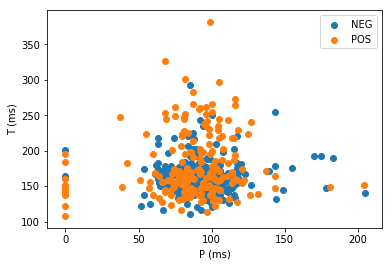

In [10]:
tmp0 = banco2.loc[(banco2.Classe == 0) & ~(banco2[col].isnull())].astype(float)

tmp1 = banco2.loc[(banco2.Classe == 1) & ~(banco2[col].isnull())].astype(float)


plt.scatter(tmp0['P (ms)'],tmp0['T (ms)'], label = 'NEG' )
plt.scatter(tmp1['P (ms)'],tmp1['T (ms)'], label = 'POS' )

plt.xlabel('P (ms)')
plt.ylabel('T (ms)')
plt.legend()
plt.show()

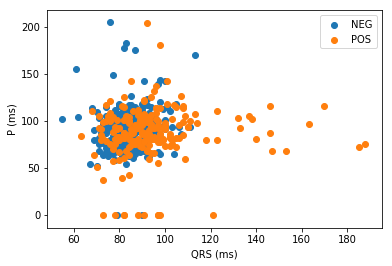

In [11]:
tmp0 = banco2.loc[(banco2.Classe == 0) & ~(banco2[col].isnull())].astype(float)

tmp1 = banco2.loc[(banco2.Classe == 1) & ~(banco2[col].isnull())].astype(float)


plt.scatter(tmp0['QRS (ms)'],tmp0['P (ms)'], label = 'NEG' )
plt.scatter(tmp1['QRS (ms)'],tmp1['P (ms)'], label = 'POS' )

plt.xlabel('QRS (ms)')
plt.ylabel('P (ms)')
plt.legend()
plt.show()

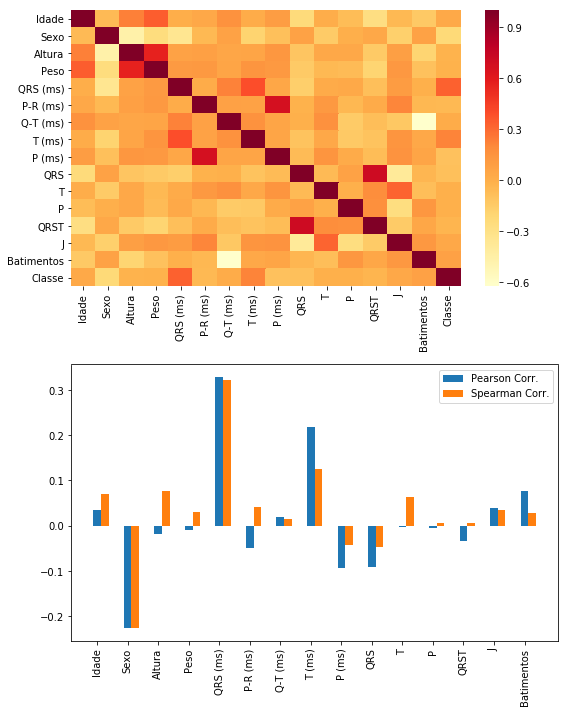

In [12]:
fig, axes = plt.subplots(2,1,figsize=(8,10))

# plotando as correlações entre atributos usando Pearson
sns.heatmap(banco2.corr(), cmap = 'YlOrRd', ax = axes[0])

corr_pearson_vet = []
corr_spearman_vet = []

# para calcular Spearman, vamos ter que percorrer todas as colunas e fazer caso a caso
for col in banco2.columns[:-1]:

    corr_pearson = banco2[col].corr(banco2['Classe'], method = "pearson")

    corr_spearman = banco2[col].corr(banco2['Classe'], method = "spearman")

    corr_pearson_vet.append(corr_pearson)
    corr_spearman_vet.append(corr_spearman)

# aqui vamos plotar as barras com as correlações de Pearson e Spearman
x_barra = np.array(range(1, len(banco2.columns)))
axes[1].bar(x_barra, corr_pearson_vet, width=0.25, label = "Pearson Corr.")
axes[1].bar(x_barra+0.25,corr_spearman_vet, width=0.25, label = "Spearman Corr.")

# aqui vamos renomear os rótulos do eixo X para colocar os nomes dos nossos atributos

axes[1].set_xticks(range(1,banco2.columns.shape[0]))
axes[1].set_xticklabels(banco2.columns, rotation=90)

axes[1].legend()

plt.tight_layout()
plt.show()

**Os coeficientes de correlação de Pearson medem somente relações lineares. Os coeficientes de correlação de Spearman medem somente ralações monotônicas. Por isso, é possível que exista uma relação significativa mesmo que os coeficientes de correlação sejam 0. Examine um gráfico de dispersão para determinar a forma da relação.** 

**Valores baixos de p são bons; Eles indicam que seus dados não ocorreram por acaso. Por exemplo, um valor p de 0,01 significa que há apenas 1% de probabilidade de que os resultados de um experimento tenham ocorrido por acaso. Na maioria dos casos, um valor p de 0,05 (5%) é aceito para significar que os dados são válidos.**

dividir o banco em masculino e feminino em dois temporarios (deixar a mesma quantidade de desfecho)
para analisar os bancos com duas visões separadas 

In [26]:
import statsmodels.formula.api as sm
import scipy as sp

reg = sm.ols(formula='Classe~Idade+Sexo+Altura+Peso+QRS+T+P+QRST+J+Batimentos', data=banco2, f).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                 Classe   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.520
Date:                Thu, 02 May 2019   Prob (F-statistic):              0.156
Time:                        15:38:45   Log-Likelihood:                -34.645
No. Observations:                  67   AIC:                             91.29
Df Residuals:                      56   BIC:                             115.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4885      1.154      2.156      0.0

In [32]:

train_cols = banco2.columns[1:]
mLogit = sm.Logit(banco2['Classe'],banco2[train_cols], missing = 'none')


mLogit_res = mLogit.fit()
print mLogit_res.summary()


MissingDataError: exog contains inf or nans

In [27]:

import statsmodels.api as sm
 
glm = sm.GLS(banco2["Classe"], sm.add_constant(banco2.drop(["Classe"], axis=1)))
res = glm.fit()
res.summary()

/home/renandrades/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


MissingDataError: exog contains inf or nans